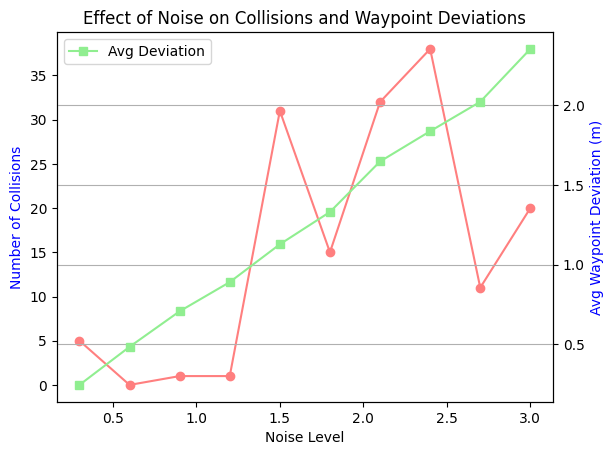

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

# Define noise levels
noise_levels = [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]
collision_counts = []
avg_deviation = []

# Read all CSV files and extract data
for noise in noise_levels:
    filename = f"waypoint_noise_incidents_{noise}.csv"
    df = pd.read_csv(filename)
    
    # Count number of collisions
    num_collisions = df[df["Collision"] == "Yes"].shape[0]
    collision_counts.append(num_collisions)
    
    # Compute average deviation (distance between original and noisy waypoints)
    df["Deviation"] = ((df["Waypoint_X"] - df["Noisy_Waypoint_X"])**2 +
                        (df["Waypoint_Y"] - df["Noisy_Waypoint_Y"])**2)**0.5
    avg_deviation.append(df["Deviation"].mean())

# Plot results
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(noise_levels, collision_counts, "o-", color="#FF7F7F", label="Collisions")
ax2.plot(noise_levels, avg_deviation, "s-", color="#90EE90", label="Avg Deviation")

ax1.set_xlabel("Noise Level")
ax1.set_ylabel("Number of Collisions", color="b")
ax2.set_ylabel("Avg Waypoint Deviation (m)", color="b")
plt.title("Effect of Noise on Collisions and Waypoint Deviations")
plt.legend()
plt.grid(True)
plt.savefig("waypoint_noise_analysis.png", dpi=300)
plt.show()
